In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inequality-in-education-around-the-world/Inequality in Education.csv


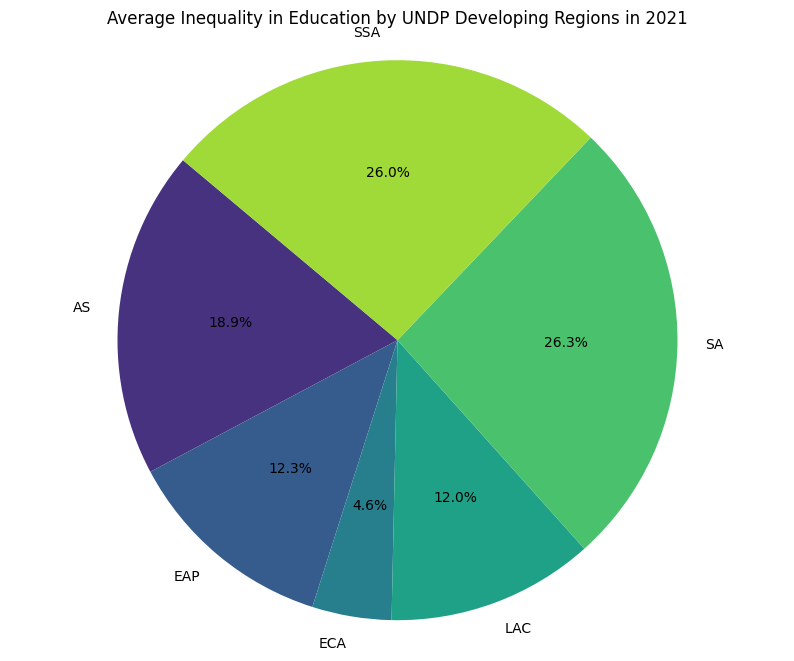

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = '/kaggle/input/inequality-in-education-around-the-world/Inequality in Education.csv'
data = pd.read_csv(file_path)
data_long = data.melt(id_vars=["ISO3", "Country", "Human Development Groups", "UNDP Developing Regions", "HDI Rank (2021)"],
                      var_name="Year", value_name="Inequality in Education")
data_long['Year'] = data_long['Year'].str.extract('(\d+)').astype(int)
data_2021 = data_long[data_long['Year'] == 2021]
avg_inequality_by_region = data_2021.groupby('UNDP Developing Regions')['Inequality in Education'].mean().dropna()
plt.figure(figsize=(10, 8))
plt.pie(avg_inequality_by_region, labels=avg_inequality_by_region.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(avg_inequality_by_region)))
plt.title('Average Inequality in Education by UNDP Developing Regions in 2021')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


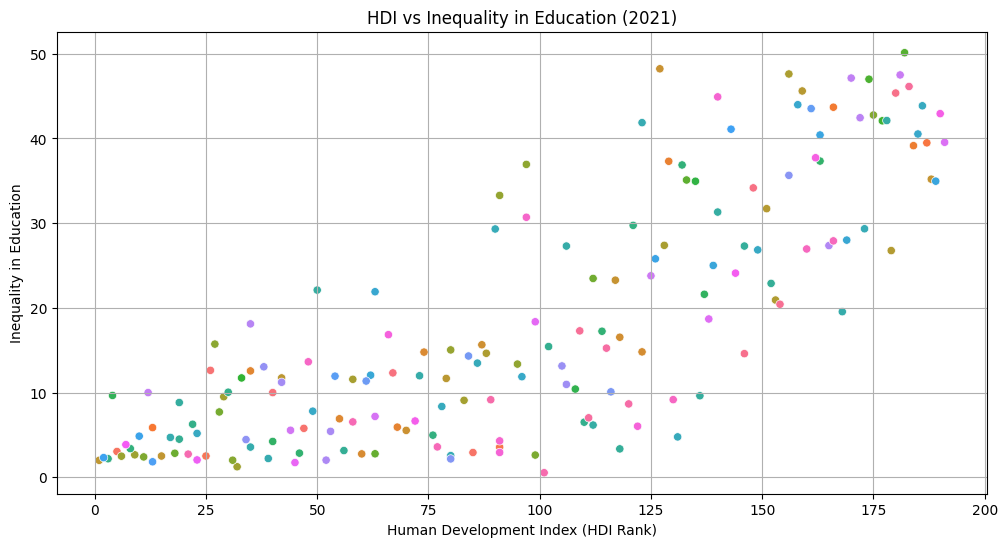

In [3]:

import seaborn as sns
data = data[['Country', 'HDI Rank (2021)', 'Inequality in Education (2021)']]
data.columns = ['Country', 'HDI', 'Inequality']
data.dropna(inplace=True)
data['HDI'] = pd.to_numeric(data['HDI'], errors='coerce')
data['Inequality'] = pd.to_numeric(data['Inequality'], errors='coerce')

# Creating the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='HDI', y='Inequality', hue='Country', legend=False)

# Customizing the plot
plt.title('HDI vs Inequality in Education (2021)')
plt.xlabel('Human Development Index (HDI Rank)')
plt.ylabel('Inequality in Education')
plt.grid(True)
plt.show()